In [3]:
import glob
import cv2
import random as random
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

In [2]:
base_path = "E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Sign-Rcognition/Images/"

image_path_by_class = []

for i in range(4):
    c_p = base_path + str(i) + "/" + "*.jpg"
    image_path_by_class.append(glob.glob(c_p))
    
# print(image_path_by_class)

test_img = cv2.imread(image_path_by_class[0][2])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(test_img)


IndexError: list index out of range

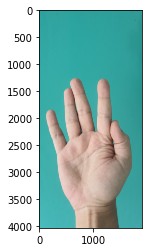

In [ ]:
# random.seed(42)
#amestecam baza de date
for a in image_path_by_class:
  
  # random.shuffle(a, lambda: .5) 
  random.Random(42).shuffle(a)
  # print(a)
# print(image_path_by_class)

test_img = cv2.imread(image_path_by_class[0][1])
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(test_img)

In [ ]:
train_path = []
test_path = []

for a in image_path_by_class:
    clasa_t = []
    clasa_v = []
    for index, elem in enumerate(a):
        # print(index, elem)
        if(index < 7):
            clasa_t.append(elem)
        else:
            clasa_v.append(elem)
    train_path.append(clasa_t)
    test_path.append(clasa_v)
            
print(len(train_path[0]), len(test_path[0]))
# print("----------")
print(test_path)

7 3
[['E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Sign-Rcognition/Images/0\\4.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Sign-Rcognition/Images/0\\0.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Sign-Rcognition/Images/0\\1.jpg'], ['E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Sign-Rcognition/Images/1\\4.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Sign-Rcognition/Images/1\\0.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Sign-Rcognition/Images/1\\1.jpg'], ['E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Sign-Rcognition/Images/2\\4.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Sign-Rcognition/Images/2\\0.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Sign-Rcognition/Images/2\\1.jpg'], ['E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Sign-Rcognition/Images/3\\4.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/Laborator/Sign-Rcognition/Images/3\\0.jpg', 'E:/Lucru/ANUL I MASTER/Semestrul 2/TAKAI/

In [ ]:
train = []
test = []

for cls in train_path:
    images = []
    for elem in cls:
        img = cv2.imread(elem)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    train.append(images)
    
for cls in test_path:
    images = []
    for elem in cls:
        img = cv2.imread(elem)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    test.append(images)

Text(0.5, 1.0, 'Test 1 din clasa 2')

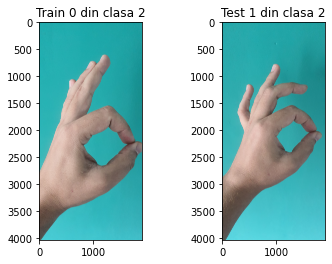

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(train[2][0])
plt.title("Train 0 din clasa 2")
plt.subplot(1,2,2)
plt.imshow(test[2][1])
plt.title("Test 1 din clasa 2")


In [ ]:
print(np.shape(test[0][0]))
# Modificam dimensiunea imaginilor pentru a fi mai usor de lucrat cu ele
# (in plus 80% din imagine este ocupata de acel verde care nu aduce nicio informatie in plus si de care ar fi bine sa scapam)

(4032, 1908, 3)


In [ ]:
h,w,c = test[0][0].shape
new_h = h // 4
new_w = w // 4
print(new_h, new_w)

for i, cls in enumerate(train):
    for j, imagine in enumerate(cls):
        r = cv2.resize(imagine, (new_w,new_h))
        train[i][j] = r
        
for i, cls in enumerate(test):
    for j, imagine in enumerate(cls):
        r = cv2.resize(imagine, (new_w,new_h))
        test[i][j] = r
        

1008 477


Text(0.5, 1.0, 'Test 2 din clasa 2')

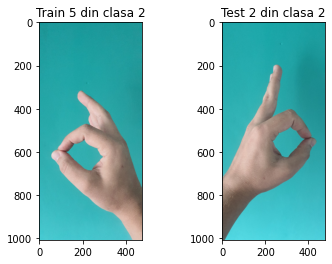

In [ ]:
test_cls = 2
train_img = 5
test_img = 2

plt.figure()
plt.subplot(1,2,1)
plt.imshow(train[test_cls][train_img])
plt.title("Train {} din clasa {}".format(train_img,test_cls))
plt.subplot(1,2,2)
plt.imshow(test[test_cls][test_img])
plt.title("Test {} din clasa {}".format(test_img,test_cls))


## Observatii fata de imagini:
1. au prea multa infornatie de culoare
1. facem histograma si observam ca putem lucra doar pe planul de rosu + verde
1. putem ignora albastrul cu totul

Transformam imaginiile in grayscale folosind media dintre canalul verde si cel rosu

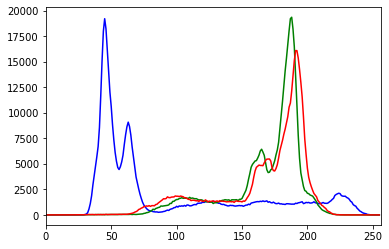

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([test[0][2]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

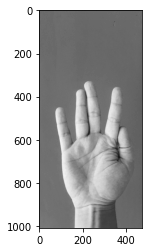

In [ ]:
train_gray = []
test_gray = []
for cls in train:
    tmp = []
    for img in cls:
        mean_img = np.mean((img[:,:,0], img[:,:,1]),axis=0)
        tmp.append(mean_img)
    train_gray.append(tmp)

for cls in test:
    tmp = []
    for img in cls:
        mean_img = np.mean((img[:,:,0], img[:,:,1]),axis=0)
        tmp.append(mean_img)
    test_gray.append(tmp)
    
plt.figure()
plt.imshow(test_gray[0][0], cmap='gray')

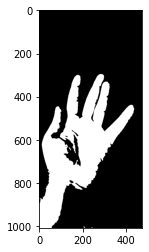

In [ ]:
#incercam sa obtinem o masca pentru mana
#de aici faceti voi multe for-uri
img = train_gray[0][0]

#prima oara trebuie neaparat un blur
kernel = np.ones((5,5),np.float32)/25
img = cv2.filter2D(img,-1,kernel)

# th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)#meh
ret,th = cv2.threshold(img,130,255,cv2.THRESH_BINARY)
plt.figure()
plt.imshow(th, cmap="gray")

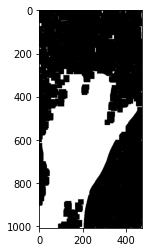

In [ ]:
img = train[0][0]

# kernel = np.ones((5,5),np.float32)/25
# img = cv2.filter2D(img,-1,kernel)
kernel = np.ones((25,25),np.uint8)

edges = cv2.Canny(img,30,41)
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)


plt.figure()
plt.imshow(edges, cmap="gray")